<a href="https://colab.research.google.com/github/youkjang/Machine-Learning-Deep-Learning-Practice/blob/main/RegressionModels_Solar_Radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solar Radiation Prediction

* Data: https://www.kaggle.com/dronio/SolarEnergy

* EDA: Heatmap, Scatterplots, and Histogram
* Compare Regression Models: Linear Regression, Random Forest, Support Vector, XGBoost, Gradient Boosting, ANN
* Predict Solar Radiation


Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
df = pd.read_csv('SolarPrediction.csv')

In [3]:
df.shape

(32686, 11)

## EDA

In [4]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [5]:
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


Is there any null values?

In [6]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

## HeatMap
* correlation map between all digit values.
* Radiatiaon and Temperature show highest correlation coefficient (0.73).


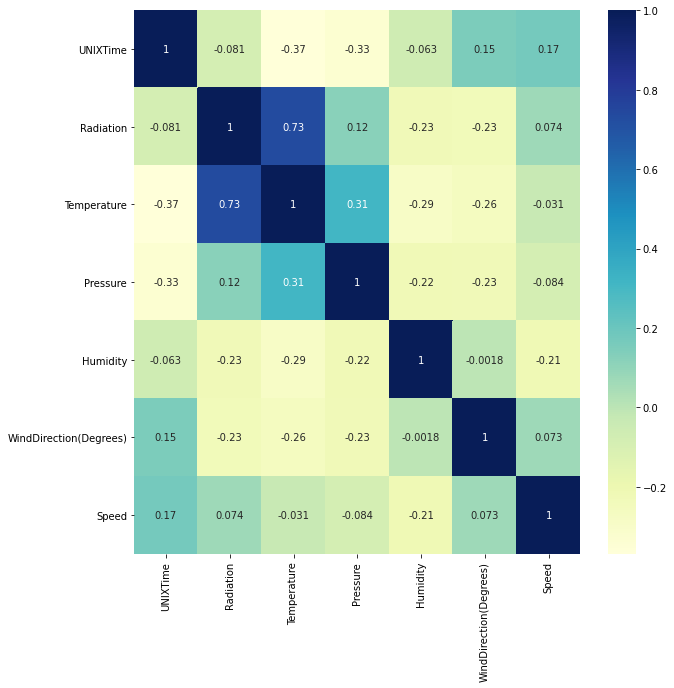

In [7]:
df1 = df.select_dtypes(exclude = 'object')

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Scatter Plot

In [8]:
def scatterp(variable):
  return sns.scatterplot(df[variable], df.Radiation, hue = df[variable])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

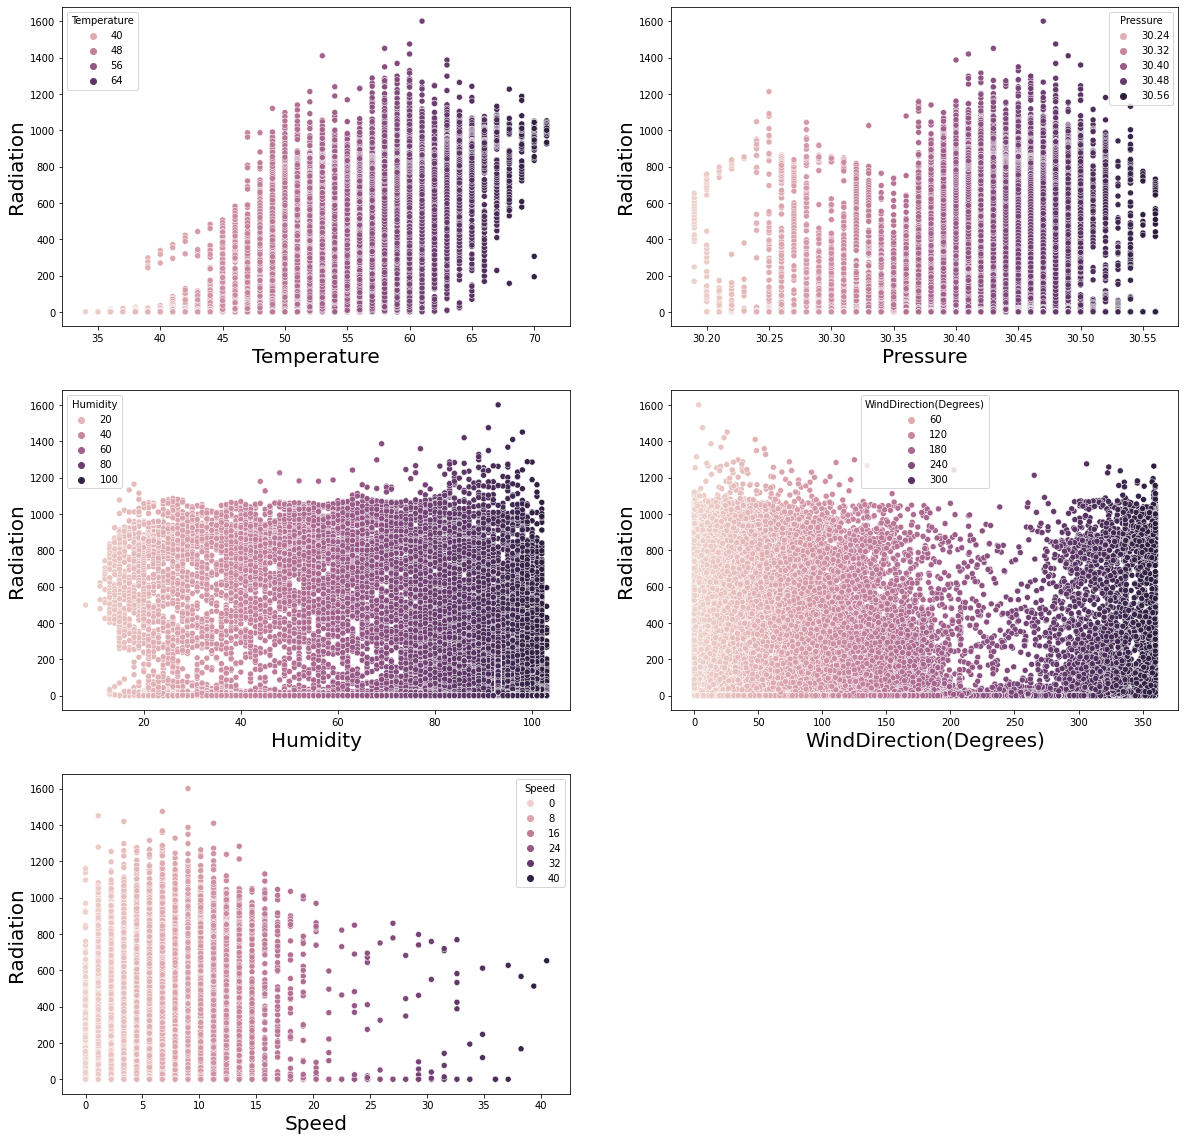

In [9]:
features = ['Temperature','Pressure','Humidity','WindDirection(Degrees)',
            'Speed']
plt.figure(figsize = (20,20))
for i in range(5):
  plt.subplot(3,2,i+1)
  ax = scatterp(features[i])
  ax.set_xlabel(features[i],fontsize=20)
  ax.set_ylabel('Radiation',fontsize=20)
plt.show()

## Histogram

Text(0, 0.5, 'Count')

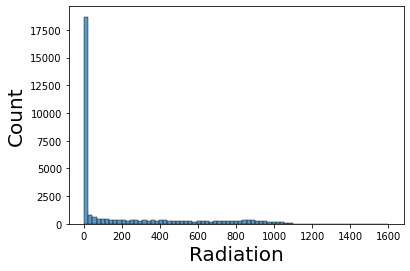

In [10]:
ax = sns.histplot(df.Radiation)
ax.set_xlabel('Radiation',fontsize=20)
ax.set_ylabel('Count',fontsize=20)

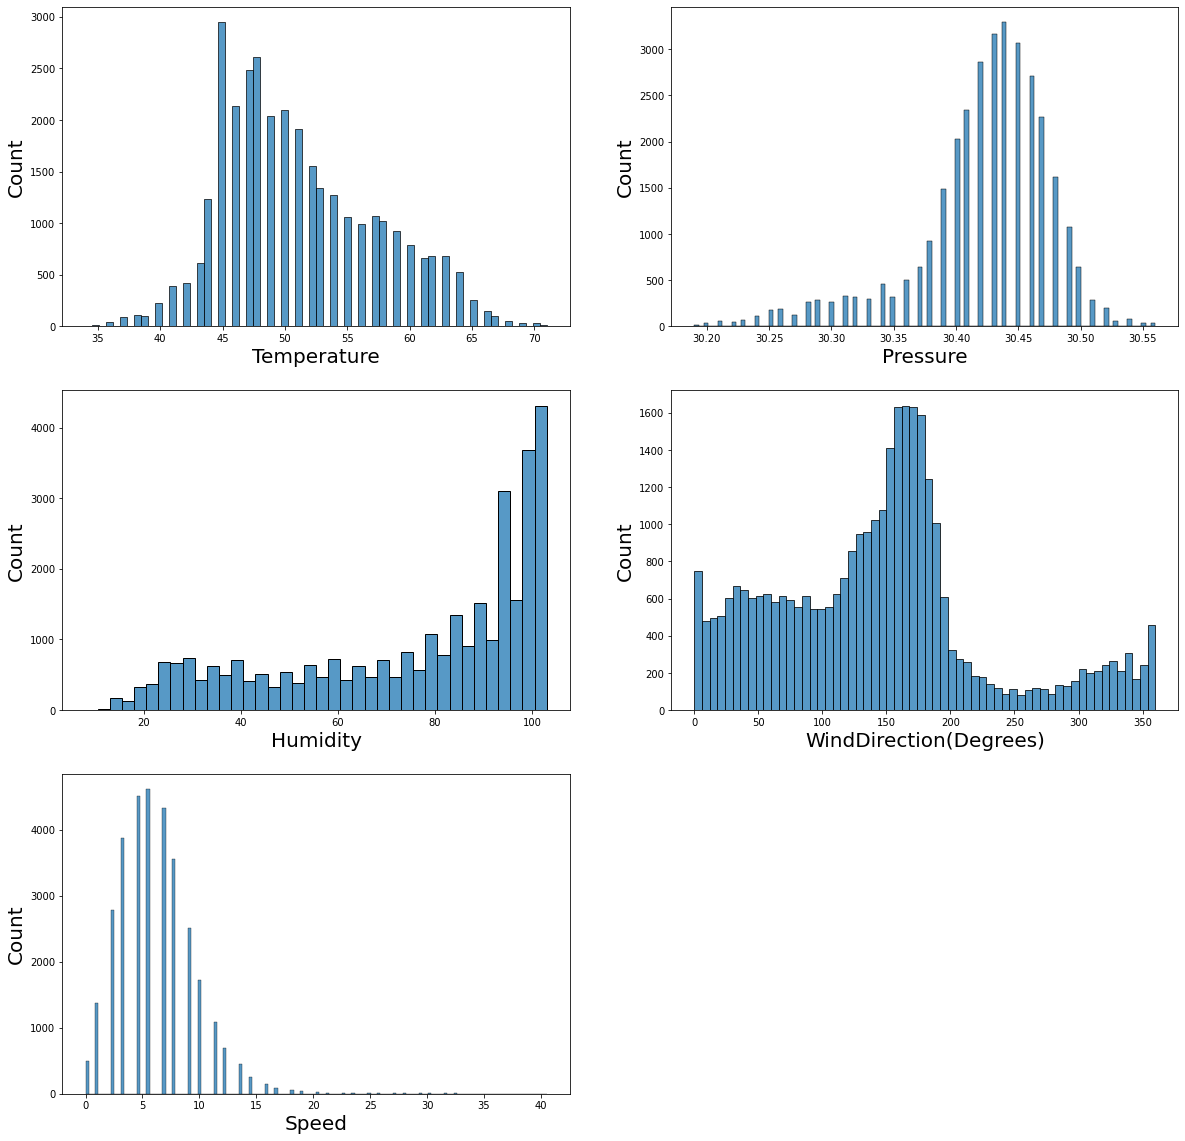

In [11]:
plt.figure(figsize = (20,20))
for i in range(5):
  plt.subplot(3,2,i+1)
  axs = sns.histplot(df[features[i]])
  axs.set_xlabel(features[i],fontsize=20)
  axs.set_ylabel("Count",fontsize=20)
plt.show()

## Preprocessing

Define X and y
* Include only digit variables

In [12]:
features = ['Temperature','Pressure','Humidity','WindDirection(Degrees)',
            'Speed']

X = df[features]
y = df['Radiation']
X.shape, y.shape

((32686, 5), (32686,))

Split train and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26148, 5), (6538, 5), (26148,), (6538,))

Standardize features by removing the mean and scaling to unit variance

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Regression Models

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict

In [16]:
pred_reg = reg.predict(X_test_sc)

## Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
pred_rf = rf.predict(X_test)

In [19]:
rf.feature_importances_

array([0.62543843, 0.07411021, 0.10883489, 0.13432574, 0.05729072])

## Support Vector Regression

In [20]:
from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [21]:
pred_svr = svr.predict(X_test)

## XGBoost

In [22]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

[04:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [23]:
pred_xgb = xgb_model.predict(X_test)

## Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model= GradientBoostingRegressor(n_estimators = 100)
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
pred_gbr = gbr_model.predict(X_test)

## Artirifical Neural Network

In [26]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [27]:
model = keras.Sequential([
                          layers.Dense(32, activation = 'relu',input_shape=[5]),
                          layers.Dropout(0.3),                    
                          layers.Dense(32,activation='relu'),  
                          layers.Dropout(0.3),                    
                          layers.Dense(1)])

In [28]:
model.compile(optimizer = 'adam', loss = 'mse')

In [29]:
history = model.fit(X_train_sc,y_train,
                    batch_size=64,
                    epochs = 100)

Epoch 1/100
409/409 [==============================] - 1s 1ms/step - loss: 132220.0007
Epoch 2/100
409/409 [==============================] - 0s 1ms/step - loss: 52782.0164
Epoch 3/100
409/409 [==============================] - 0s 1ms/step - loss: 43763.5484
Epoch 4/100
409/409 [==============================] - 0s 1ms/step - loss: 41840.3496
Epoch 5/100
409/409 [==============================] - 0s 1ms/step - loss: 41112.6519
Epoch 6/100
409/409 [==============================] - 0s 1ms/step - loss: 41000.6045
Epoch 7/100
409/409 [==============================] - 0s 1ms/step - loss: 40290.6848
Epoch 8/100
409/409 [==============================] - 0s 1ms/step - loss: 39428.7948
Epoch 9/100
409/409 [==============================] - 0s 980us/step - loss: 39715.4289
Epoch 10/100
409/409 [==============================] - 0s 1ms/step - loss: 40804.6881
Epoch 11/100
409/409 [==============================] - 0s 956us/step - loss: 39160.7827
Epoch 12/100
409/409 [=========================

In [30]:
pred_ann = model.predict(X_test_sc)

## Evaluate

In [31]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import explained_variance_score as evs

def evaluation_metrics(actual, prediction):
  mae_rt = mae(actual, prediction)
  mse_rt = mse(actual, prediction)
  r2_rt = r2(actual, prediction)
  print("Mean Absolute Errors:: ", mae_rt, "||  Mean Square Erros:: ",mse_rt)
  print("R2 :: ", r2_rt)
  return 


Linear Regression

In [32]:
evaluation_metrics(y_test,pred_reg)


Mean Absolute Errors::  157.77528906338785 ||  Mean Square Erros::  43953.69463410248
R2 ::  0.5658951144356728


Random Forest Regression

In [33]:
evaluation_metrics(y_test,pred_rf)

Mean Absolute Errors::  90.64752414638617 ||  Mean Square Erros::  26001.59502041337
R2 ::  0.7431974826055027


Support Vector Regression

In [34]:
evaluation_metrics(y_test,pred_svr)

Mean Absolute Errors::  160.9547917232587 ||  Mean Square Erros::  50439.62399161809
R2 ::  0.5018373908481294


XGBoost Regression

In [35]:
evaluation_metrics(y_test,pred_xgb)

Mean Absolute Errors::  110.39739516475946 ||  Mean Square Erros::  31697.319181413488
R2 ::  0.6869441526931964


Gradient Boosting Regression

In [36]:
evaluation_metrics(y_test,pred_gbr)

Mean Absolute Errors::  109.72404056403582 ||  Mean Square Erros::  31595.23652553038
R2 ::  0.6879523632661446


ANN

In [37]:
evaluation_metrics(y_test,pred_ann)

Mean Absolute Errors::  116.34884128918303 ||  Mean Square Erros::  33885.966853455226
R2 ::  0.665328162157667


* Random Forest Regression Model shows the lowest MAE (90.97), MSE (26147.39), and the highest R2 (0.74).


## Reference
1.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

2.https://www.kaggle.com/iabhishekmaurya/evaluating-regression-models

3.https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html